In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Modyfikacja sygnału w dziedzinie częstotliwości

Weźmy sygnał sinusoidalny zawierający dwie częstotliwości: $1kHz$ i $2kHz$. Chcemy z tego sygnału usunąć jedną z tych częstotliwości, ale nie wiemy nic na temat filtrowania - jest na to prosty sposób oparty o szybką transformatę Fouriera i jej odswrotną funckję.

1. Wygeneruj w/w sygnał i narysuj jego wykres. Możesz użyć funkcji *P.xlim(0,0.01)* żeby zbliżyć początek wykresu.
2. Oblicz transformatę Fouriera i narysuj widmo amplitudowe sygnału.
3. Skasuj wartości na jednej z wybranej częstotliwości i jakimś zakresie przed i po, np $900-1100 Hz$, żeby skasować sygnał $1kHz$.
4. Weź pod uwagę że transformata Fouriera musi być symteryczna, więc zastosuj operację opisaną niżej.
5. Narysuj poprawiony wykres widma sygnału.
6. Dokonaj odwrotnej transformaty i narysuj poprawiony sygnał. Wypisz również wartośc próbek sygnału. Jeśli operacja w pkt. 6 została dokonana poprawnie, wartość liczb urojonych (*np.imag*) wyniku powinien być zero (albo bardzo bliski zera).

## Symetryczność Hermitowska

\begin{equation}
H_{F_{s}-x}=H_x^\star \text{, dla } x \in <1,F_s-1>
\end{equation}

Implementacyjnie można zastosować następujące kroki/funkcje:

1. Pobieramy wartości lewej części wykresu (bez 0 i $F_s/2$)
2. Stosujemy *np.flipud* żeby je odwrócić
3. Stosujemy na tym *np.conj* żeby wyliczyć sprzężenie.
4. Wklejamy wynik na odpowiednie miejsce po prawej stronie wykresu (również bez $F_s/2$)

4.01377760014e-17


/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 0.01)

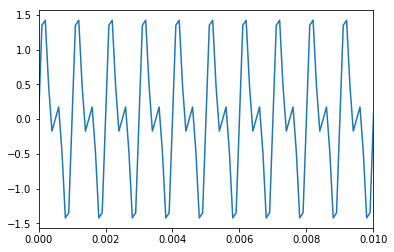

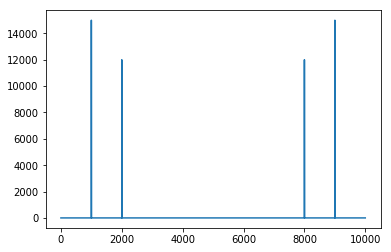

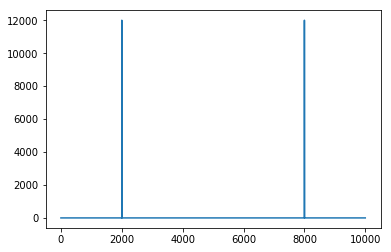

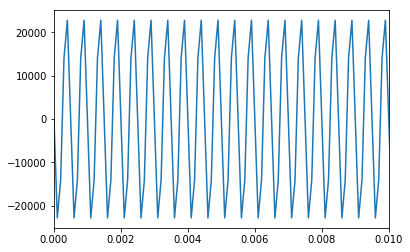

In [2]:
T = 3
Fs = 10000.0
t = arange(0,T,1/Fs)


f1 = 1000
f2 = 2000

y = sin( 2 * pi * f1 * t ) + 0.8 * sin( 2 * pi * f2 * t )

figure()
plot(t,y)
xlim(0,0.01)

Y = fft.fft(y)

figure()
f = linspace( 0, Fs, y.size)
plot(f,abs(Y))

from IPython.display import display,Audio

display(Audio(y, rate = Fs))

Y[2700 : 3300] = 0

N = y.size

h = Y[1:int(N/2)]

h = flipud(h)
h = conj(h)
Y[int(N/2+1):] = h

figure()
plot(f,abs(Y))

y = fft.fft(Y)

print(sum(imag(y)**2))

figure()
plot(t,y)
xlim(0,0.01)


## Alternatywne rozwiązanie

Zamiast funkcji *np.fft.fft* i *np.fft.ifft* można stosować bardziej wydajne funkcje *np.fft.rfft* i *np.fft.irfft*. R-FFT liczy tylko lewą część wykresu (czyli od $0..F_s/2$), a I-R-FFT liczy odwrotną funkcję z wyniku R-FFT ignorując wymogi symetrii, jak w przykładzie powyżej.

Powtórz poprzednie zadanie użwyając *np.fft.rfft* i *np.fft.irfft*.

(0, 0.01)

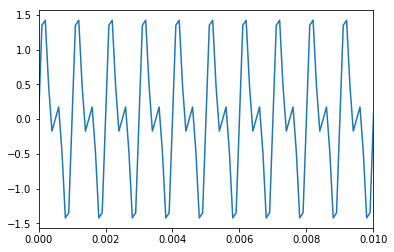

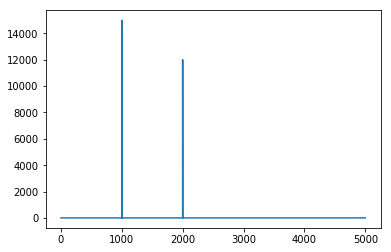

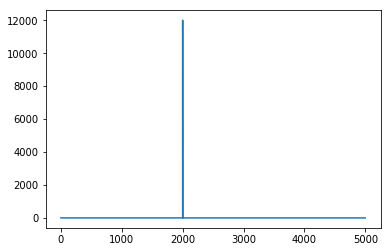

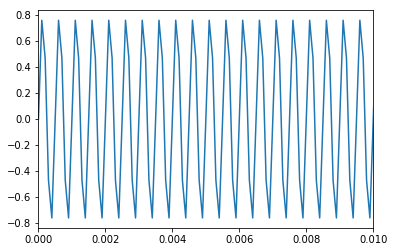

In [3]:
T = 3
Fs = 10000.0
t = arange(0,T,1/Fs)


f1 = 1000
f2 = 2000

y = sin( 2 * pi * f1 * t ) + 0.8 * sin( 2 * pi * f2 * t )

figure()
plot(t,y)
xlim(0,0.01)

Y = fft.rfft(y)

figure()
f = linspace( 0, Fs/2, Y.size)
plot(f,abs(Y))

Y[2700 : 3300] = 0

figure()
plot(f,abs(Y))

y = fft.irfft(Y)

figure()
plot(t,y)
xlim(0,0.01)

# Przeciek częstotliwości

1. Wygeneruj sekwencję liczb od 999 do 1001 w ilości np. 100 sztuk.
2. W pętli dokonaj utworzenie sygnału o częstotliwości z pkt 1, amplitudzie 1 i zerowej fazie.
3. Również w pętli wylicz transformatę Fouriera sygnału i policz wartość wierzchołka (funkcją *np.max*) i zapisz wynik w jakiejś liście.
4. Narysuj listę wartości z pkt. 3. na wykresie którego oś X to wartości z pkt. 1.

Zauważ, że wartość amplitudy wcale nie jest stała i zmienia się nawet o 40%! Zobaczmy jak wyglądają wykresy skrajnych wartości tego eksperymentu. Narysuj wykres transformaty Fouriera sygnału o częstotliwości gdzie amplituda była najniższa i najwyższa (możesz policzyć *np.argmin* z listy w pkt. 3 oraz użyć tego indeksu żeby pobrać wartość z listy w pkt. 1). Zbliż wykres widma amplitudowego do zakresu częstotliwości od $980 Hz$ do $1020 Hz$ używając *P.xlim*.

Zauważ, że w maksymalnym przypadku wykres wygląda idealnie: jest jeden punkt, a jego wartość jest równa wartości amplitudy pomnożonej przez połowę ilości próbek sygnału (druga połowa się znajduje na prawej stronie wykresu). 



W minimalnym przypadku wykres wygląda zupełnie inaczej. Ponieważ położenie analizowanej częstotliwości nie leży w żadnym punkcie transformaty, amplituda tej sinusoidy się "rozlewa" na sąsiednie wartości.

(990, 1010)

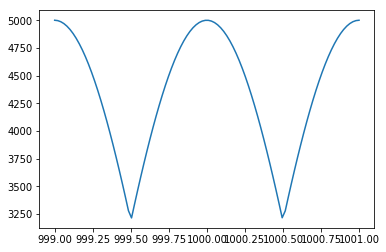

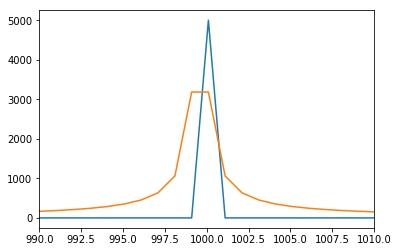

In [4]:
T = 1
Fs = 10000
t = arange(0, T, 1/Fs)

fs = linspace(999, 1001, 100)
hs = []

for f in fs:
    
    y = sin( 2 * pi * f * t )
    
    Y = fft.fft(y)
    
    h = max( abs(Y) )
    
    hs.append(h)
    
plot(fs, hs)


y = sin( 2 * pi * 1000 * t)
Y = fft.fft(y)
f = linspace(0, Fs, Y.size)

figure()
plot(f, abs(Y))
xlim(990, 1010)


y2= sin( 2 * pi * 999.5 * t)
Y = fft.fft(y2)
f = linspace(0, Fs, Y.size)

plot(f, abs(Y))
xlim(990, 1010)

# Okienkowanie

Narysuj funkcję Hamminga i jej widmo amplitudowe. Wygneruj 10ms sygnału sinusowego o 1 kHz. Narysuj jego widmo amplitudowe i zauważ jaki ma przeciek. Pomnoż teraz ten sygnał z oknem Hamminga (o tej samej długości) i ponownie narysuj jego widmo amplitudowe. 

(990, 1010)

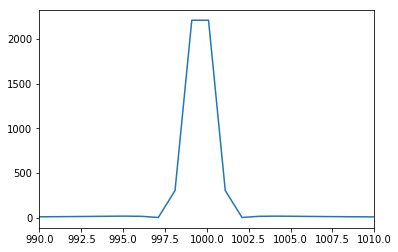

In [5]:
y = sin( 2 * pi * 999.5 * t)
h = hamming( y.size )
y*= h

Y = fft.fft(y)
f = linspace(0, Fs, Y.size)

plot(f, abs(Y))
xlim(990, 1010)

# STFT

Zaimplementujmy własną STFT. Zacznijmy od zdefiniowania sygnału. Zróbmy najpierw sygnał 5 sekundowy o $F_s$ 16 kHz, składający się z jednej składowej 1000 Hz i wzrastającej częstotliwości o 0 do $2*F_s$. Inny sygnał możesz wczytać z pliku.

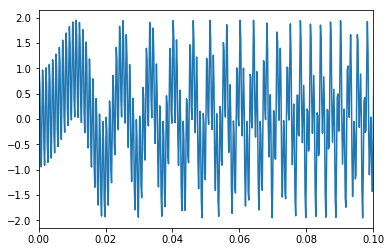

In [6]:
T = 5
Fs = 5000
t = arange(0, T, 1/Fs)

y1 = sin( 2 * pi * 1000 * t)

f = linspace(0, Fs*2, t.size)
y2 = sin( 2 * pi * f * t)

y = y1 + y2

plot(t, y)
xlim(0, 0.1)

display(Audio(y, rate = Fs))

Zacznijmy od podziału sygnału na krótko-okresowe okienka, albo ramki.

Zdefiniuj najpierw takie zmienne:

  * $L$ - długość sygnału (w próbkach)
  * $T$ - długość sygnały (w sekundach) 
  * $win\_len$ - szerokość okienka (w próbkach) - np. 256
  * $win\_shift$ - przesunięcie okienka (w próbkach) - np. 128
  * $win\_num$ - ilość okienek sygnału (zaokrąglone w dół) - $\frac{L-win\_len}{win\_shift}+1$
  * $S$ - macierz 2D zer o rozmiarze ($\frac{win\_len}{2}+1$,$win\_num$)
  
W pętli wyciągnijmy poszczególne ramki ze sygnału, a potem wykonajmy transformatę Fouriera na każdej ramce osobno i wynik zapiszmy w macierzy S.

Oblicz indeksy osi X i Y wykresu i użyj metody *pyploy.pcolormesh* żeby narysować moduł tablicy S. Możesz też wyliczyć logarytm z modułu, żeby lepiej zobaczyć "szczegóły".

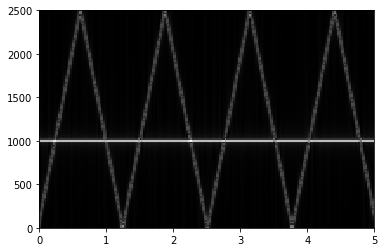

In [7]:
L = y.size
T = y.size/Fs

win_len = 256
win_shift = 128
frame_rate = Fs/win_shift
win_num = int( (L-win_len)/win_shift ) +1

S = zeros(( int(win_len/2 +1), win_num ))

for w in range(win_num):
    
    win_beg = w * win_shift
    
    win_end = win_beg + win_len
    
    win = copy( y[win_beg : win_end] )
    
    S[:,w] = abs( fft.rfft(win) )
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2 +1))

pcolormesh(t, f, S, cmap = cm.gray)

Obraz jest dosyć zaszumiony. Zastosuj jakąś funkcję okienkującą, żeby go "wyczyścić".

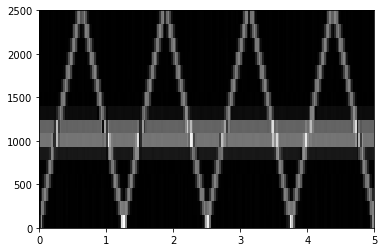

In [8]:
L = y.size
T = y.size/Fs

# win_len = 256
win_len = 32
win_shift = 128
frame_rate = Fs/win_shift
win_num = int( (L-win_len)/win_shift ) +1

S = zeros(( int(win_len/2 +1), win_num ))

for w in range(win_num):
    
    win_beg = w * win_shift
    
    win_end = win_beg + win_len
    
    win = copy( y[win_beg:win_end] )
    win*= hamming(win.size)
    
    S[:,w] = abs( fft.rfft(win) )
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2 +1))

pcolormesh(t, f, S, cmap = cm.gray)

Co się stanie jak zmienimy rozmiar okienka?

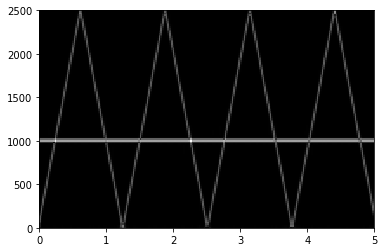

In [9]:
L = y.size
T = y.size/Fs

win_len = 256
# win_len = 32
win_shift = 128
frame_rate = Fs/win_shift
win_num = int( (L-win_len)/win_shift ) +1

S = zeros(( int(win_len/2 +1), win_num ))

for w in range(win_num):
    
    win_beg = w * win_shift
    
    win_end = win_beg + win_len
    
    win = copy( y[win_beg:win_end] +5)
    win-= win.mean()
    win*= hamming(win.size)
    
    S[:,w] = abs( fft.rfft(win) )
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(win_len/2 +1))

pcolormesh(t, f, S, cmap = cm.gray)

Co sie stanie jak dodamy DC-offset do sygnału?

Obraz ma dosyć niską "rozdzielczość". Dodaj parametr $fftn$ (np. 512 - generalnie potęga 2) i policz każdą transformatę Fouriera  na okienku z dopisanymi zerami, tak żeby rozmiar okienka odpowiadał temu parametrowi (tzw. *zero-padding*).

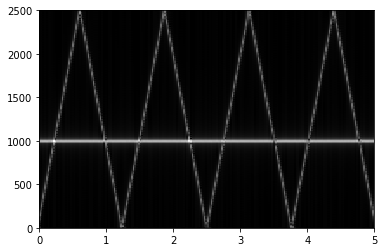

In [10]:
L = y.size
T = y.size/Fs

win_len = 256
win_shift = 128
frame_rate = Fs/win_shift
win_num = int( (L-win_len)/win_shift ) +1

fftn = 512
win = zeros(fftn)

S = zeros(( int(fftn/2 +1), win_num ))

for w in range(win_num):
    
    win_beg = w * win_shift
    
    win_end = win_beg + win_len
    
    win_tmp = copy( y[win_beg:win_end] )
    win_tmp-= win_tmp.mean()
    
    win[:win_tmp.size] = win_tmp
    win*= hamming(win.size)
    
    S[:,w] = abs( fft.rfft(win) )
    
t = linspace(0, T, win_num)
f = linspace(0, Fs/2, int(fftn/2 +1))

pcolormesh(t, f, S, cmap = cm.gray)

Użyj teraz funkcji *pyplot.specgram* żeby osiągnąć to samo. Sprawdź dokumentację żeby zobaczyć poszcególne parametry.

(array([[  4.80898772e-05,   4.26499287e-11,   1.03428867e-12, ...,
           2.99025681e-10,   2.66240255e-10,   3.57749435e-06],
        [  2.30947346e-04,   2.62746973e-08,   1.22479005e-10, ...,
           6.48390037e-10,   3.83496063e-09,   1.47115820e-05],
        [  8.38912269e-04,   1.75014768e-07,   5.76595740e-10, ...,
           8.23486972e-10,   1.97686691e-08,   6.55728466e-05],
        ..., 
        [  3.10128629e-14,   2.06455099e-14,   5.20512382e-15, ...,
           2.13955418e-14,   4.03353279e-15,   1.85911665e-15],
        [  3.08129992e-14,   2.04379834e-14,   5.03182377e-15, ...,
           2.12320709e-14,   3.75478901e-15,   1.70397010e-15],
        [  1.53733075e-14,   1.01845323e-14,   2.48713086e-15, ...,
           1.05887232e-14,   1.83109226e-15,   8.26148134e-16]]),
 array([    0.     ,    19.53125,    39.0625 ,    58.59375,    78.125  ,
           97.65625,   117.1875 ,   136.71875,   156.25   ,   175.78125,
          195.3125 ,   214.84375,   234.375  ,

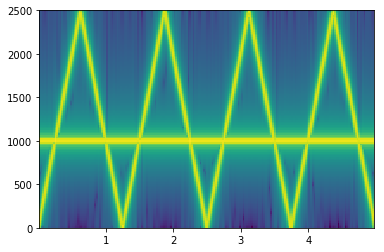

In [11]:
specgram(y, Fs=Fs)

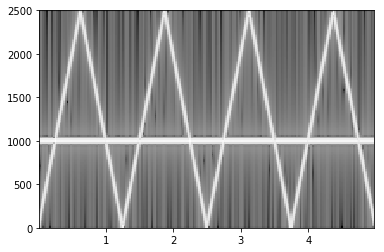

In [12]:
S = specgram(y, Fs=Fs, cmap=cm.gray, window = hamming(256), NFFT=256, mode='psd')

# Praca domowa

## 1. Filtrowanie w dziedzinie częstotliwości

Użyj metody modyfikacji sygnału w dziedzinie częstotliwości żeby odtworzyć tylko niskie ($<200Hz$), średnie (między $500Hz$, a $1000Hz$) oraz wysokie (między $2 kHz$, a $4 kHz$) częstotliwości pliku *zdanie.wav*.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


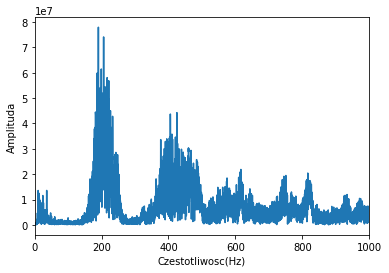

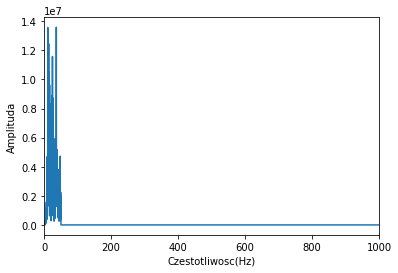

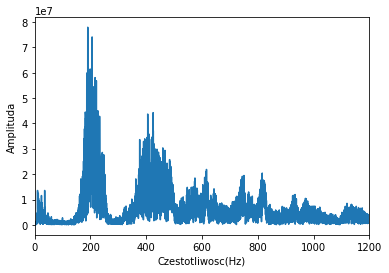

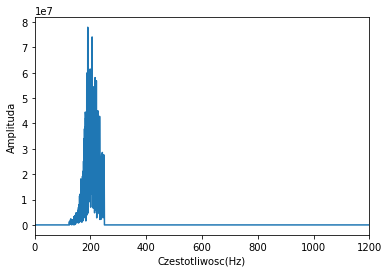

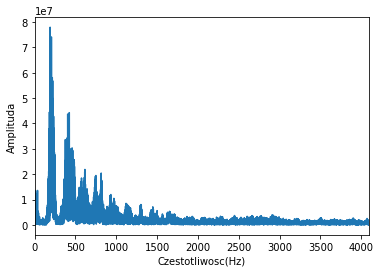

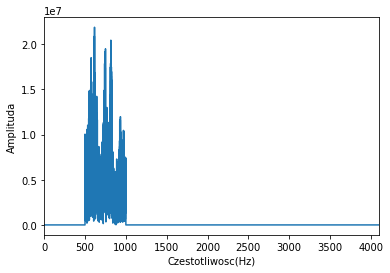

In [20]:
%pylab inline

from scipy.io.wavfile import read
Fs, y = read('zdanie.wav')
N = y.size
display(Audio(y, rate = Fs))

def cutfreq(maxfreq, zoom):
    Fs, y = read('zdanie.wav')
    N=y.size

    fy = linspace(0,Fs,y.size)
    # figure()
    # plot(fy, abs(y))

    Y = fft.rfft(y)    
    
    def find_index(freq):
        return (freq * Y.size) // (2 * Fs)

#     assert(Y.size == N/2)
#     min_index = find_index(minfreq)
    max_index = find_index(maxfreq)
#     print(max_index)

#     min_index = (minfreq * Y.size) // (2 * Fs)
#     max_index = (maxfreq * Y.size) // (2 * Fs)

    figure()
    f = linspace(0, Fs//2, Y.size)
    plot(f, abs(Y))
    xlim(0, zoom)
    xlabel(u'Czestotliwosc(Hz)')
    ylabel(u'Amplituda')

    Y[max_index:] = 0

    figure()
    plot(f, abs(Y))
    xlim(0, zoom)
    xlabel(u'Czestotliwosc(Hz)')
    ylabel(u'Amplituda')
    y = fft.irfft(Y)
    
    display(Audio(y, rate = Fs))
    
def cutfreqduo(minfreq, maxfreq, zoom):
    Fs, y = read('zdanie.wav')

    N=y.size

    fy = linspace(0,Fs,y.size)
    # figure()
    # plot(fy, abs(y))

    Y = fft.rfft(y)    
    
    def find_index(freq):
        return (freq * Y.size) // (2 * Fs)
    
#     assert(Y.size == N/2)

    min_index = find_index(minfreq)
#     print(min_index)
    max_index = find_index(maxfreq)
#     print(max_index)

#     min_index = (minfreq * Y.size) // (2 * Fs)
#     max_index = (maxfreq * Y.size) // (2 * Fs)

    figure()
    f = linspace(0, Fs//2, Y.size)
    plot(f, abs(Y))
    xlim(0, zoom)
    xlabel(u'Czestotliwosc(Hz)')
    ylabel(u'Amplituda')

    Y[:min_index] = 0
    Y[max_index:] = 0

    figure()
    plot(f, abs(Y))
    xlim(0, zoom)
    xlabel(u'Czestotliwosc(Hz)')
    ylabel(u'Amplituda')
    y = fft.irfft(Y)
    
    display(Audio(y, rate = Fs))

cutfreq(200, 1000)
cutfreqduo(500, 1000, 1200)
cutfreqduo(2000, 4000, 4100)

## 2. Funkcje okienkowe

Narysuj i przetestuj następujące funkcje apodyzacyjne obecne w pakiecie numpy:

* bartlett
* blackman
* hamming
* hanning
* kaiser

Przetestuj również różne ustawienia wartości $\beta$ dla funkcji *kaiser* według porad na stronie:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.kaiser.html

Zwróć szczególną uwagę na widmo amplitudowe w skali logarytmicznej poszczególnych okienek.

Bartlett:
Blackman:
Similar to a Blackman:
Hamming:
Similar to a Hamming:
Hanning:
Similar to a Hanning:
Rectangular:
My Kaiser test#1 (beta=1):
My Kaiser test#2 beta=10):


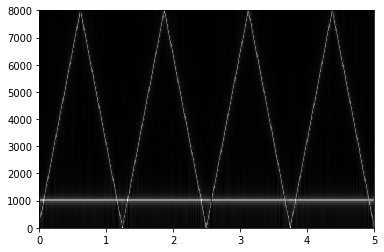

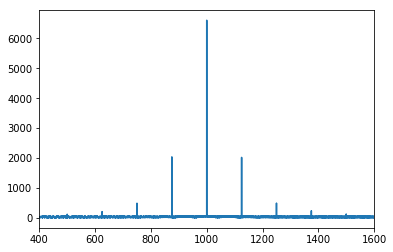

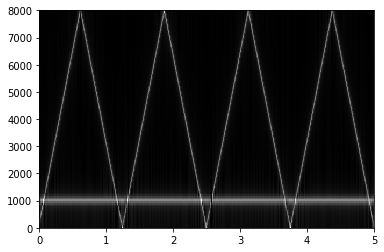

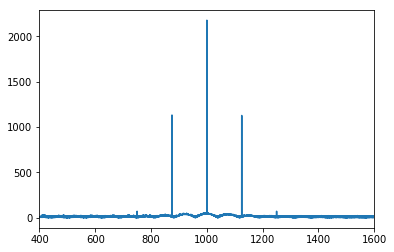

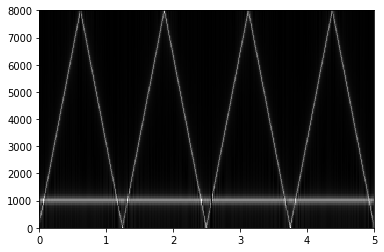

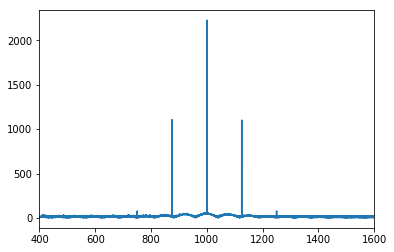

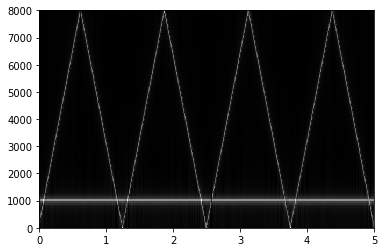

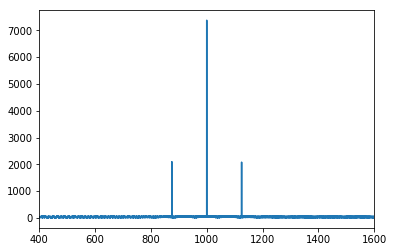

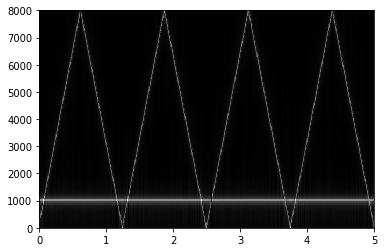

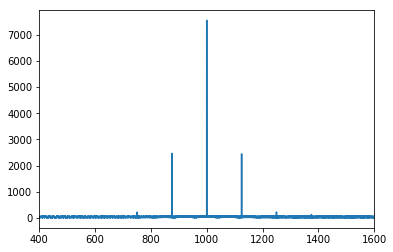

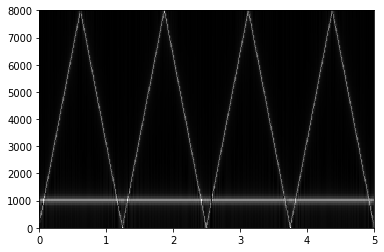

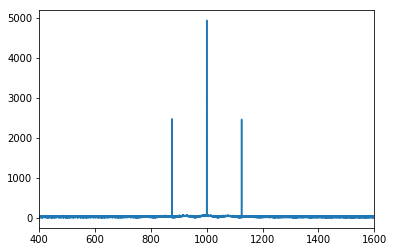

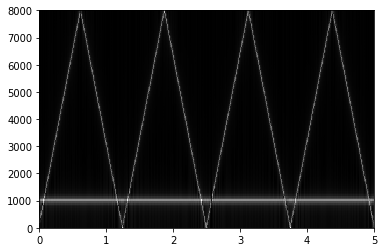

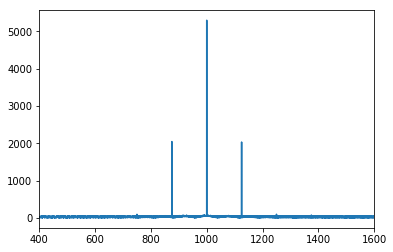

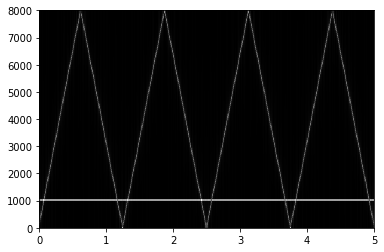

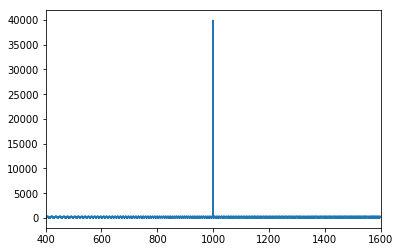

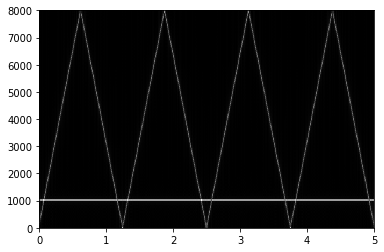

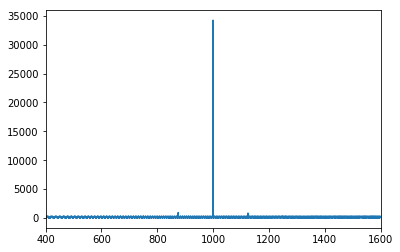

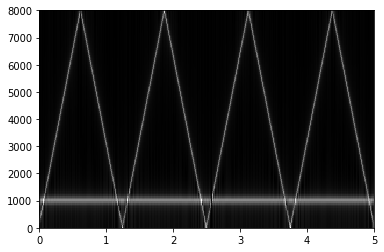

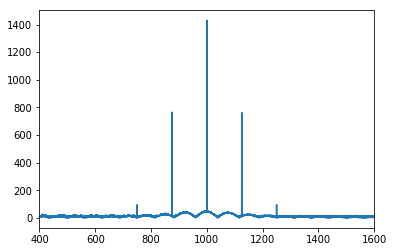

In [19]:
T = 5
Fs = 16000
t = arange(0, T, 1/Fs)

y1 = sin(2*pi*1000*t)

f = linspace(0, Fs*2, t.size)
y2 = sin(2*pi*f*t)

y = y1 + y2

#     plot(t,y)
#     xlim(0, 0.1)

#     display(Audio(y, rate = Fs))

L = y.size
T = y.size / Fs

win_len = 256
win_shift = 128
frame_rate = Fs / win_shift
win_num = int((L - win_len) / win_shift) + 1

S = zeros((int(win_len/2 + 1), win_num))

def apodfunc(x):
#     print(x.__name__)
    g = y.copy()

    for w in range(win_num):

        win_beg = w * win_shift
        win_end = win_beg + win_len

        win = g[win_beg:win_end]
        win *= x(win.size)

        S[:,w] = abs(fft.rfft(win))

    t = linspace(0, T, win_num)
    f = linspace(0, Fs/2, int(win_len/2+1))
    figure()
#     xlim(0, 0.1)
    pcolormesh(t,f,S,cmap=cm.gray)
    figure()
    xlim(400, 1600)
    Y = fft.fft(g)
    f = linspace(0,Fs,Y.size)
    plot(f, abs(Y))
    
def kaiserfunc(x,q):
#     print(x.__name__)
    g = y.copy()
    
    for w in range(win_num):

        win_beg = w * win_shift
        win_end = win_beg + win_len

        win = g[win_beg:win_end]
        win *= x(win.size, q)

        S[:,w] = abs(fft.rfft(win))

    t = linspace(0, T, win_num)
    f = linspace(0, Fs/2, int(win_len/2+1))
    figure()
    pcolormesh(t,f,S,cmap=cm.gray)
    figure()
    xlim(400, 1600)
    Y = fft.fft(g)
    f = linspace(0,Fs,Y.size)
    plot(f, abs(Y))

print('Bartlett:')
apodfunc(np.bartlett)

print('Blackman:')
apodfunc(np.blackman)
print('Similar to a Blackman:')
kaiserfunc(np.kaiser, 8.6)

print('Hamming:')
apodfunc(np.hamming)
print('Similar to a Hamming:')
kaiserfunc(np.kaiser, 5)

print('Hanning:')
apodfunc(np.hanning)
print('Similar to a Hanning:')
kaiserfunc(np.kaiser, 6)

print('Rectangular:')
kaiserfunc(np.kaiser, 0)
print('My Kaiser test#1 (beta=1):')
kaiserfunc(np.kaiser, 1)
print('My Kaiser test#2 beta=10):')
kaiserfunc(np.kaiser, 10)